# Read data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! git clone https://github.com/JNADatathon2022/Datathon

Cloning into 'Datathon'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 3), reused 18 (delta 1), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [ ]:
! mv Datathon/data/* . && ls

cities_data_costs.csv  Datathon		       product_weight_class.csv
cities_data.csv        orders.csv	       sample_data
dataframefinal.csv     product_attributes.csv  test.csv


In [ ]:
# read train data
df_orders = pd.read_csv("orders.csv", sep=";")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")
df_weight = pd.read_csv("product_weight_class.csv", sep = ",")
df_cities_costs = pd.read_csv("cities_data_costs.csv", sep = ",")

# read test data
df_test = pd.read_csv("test.csv", sep=";")

# Data Cleaning


In [ ]:
df_orders.loc[df_orders['origin_port'] == 'BCN', 'origin_port'] = 'Barcelona'
df_orders.loc[df_orders['origin_port'] == 'ATHENAS', 'origin_port'] = 'Athens'
df_orders.loc[df_orders['logistic_hub'].isnull(), 'logistic_hub'] = '-1'

In [ ]:
df_orders['units'] = pd.qcut(df_orders.units, q=10, precision=1,
                                 labels=False)

Text(0.5, 1.0, 'units')

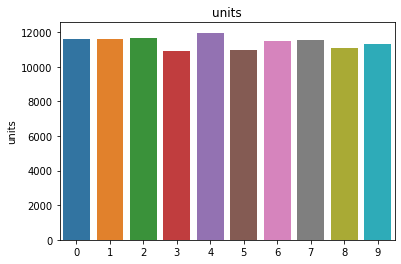

In [ ]:
sns.barplot(x=df_orders['units'].value_counts().index, y=df_orders['units'].value_counts()).set_title('units')

# Data Joining

In [ ]:
df_orders.columns

Index(['order_id', 'origin_port', '3pl', 'customs_procedures', 'logistic_hub',
       'customer', 'product_id', 'units', 'late_order'],
      dtype='object')

In [ ]:
#Merge info about products
df_merge_product = pd.merge(df_products,df_weight,on='product_id')
df_merge_product.head()

,product_id,weight,material_handling,weight_class
0,1672707,2876,3,9
1,1694456,2785,5,9
2,1682865,2751,3,9
3,1689146,2736,0,9
4,1664069,2707,4,9


In [ ]:
df_orders_copy = df_orders

In [ ]:
df_orders_copy.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,9,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,3,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,3,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,9,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,0,False


In [ ]:
df_orders_copy = pd.merge(df_orders_copy, df_merge_product, on = "product_id")
df_orders_copy.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,9,True,1778,5,8
1,088f2e0d2138,Barcelona,v_004,DTD,Hamburg,Milan,1692723,0,False,1778,5,8
2,8ffc8fd4719e,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,1692723,4,False,1778,5,8
3,9efa143a9a01,Rotterdam,v_004,DTP,Rome,Cologne,1692723,1,False,1778,5,8
4,02532624e5c2,Athens,v_004,DTP,Lille,Bucharest,1692723,7,False,1778,5,8


In [ ]:
df_cities_costs.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,weight_class,cost_per_unit,co2_per_unit
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,0,429.76,819.77
1,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,1,472.74,901.75
2,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,2,515.71,983.73
3,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,3,558.69,1065.70
4,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,4,601.66,1147.68


In [ ]:
df_copy_2 = df_orders_copy.reindex(columns = df_orders_copy.columns.tolist() + ["distance", "cost_per_unit", "co2_per_unit"])
df_copy_2.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,9,True,1778,5,8,NaN,NaN,NaN
1,088f2e0d2138,Barcelona,v_004,DTD,Hamburg,Milan,1692723,0,False,1778,5,8,NaN,NaN,NaN
2,8ffc8fd4719e,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,1692723,4,False,1778,5,8,NaN,NaN,NaN
3,9efa143a9a01,Rotterdam,v_004,DTP,Rome,Cologne,1692723,1,False,1778,5,8,NaN,NaN,NaN
4,02532624e5c2,Athens,v_004,DTP,Lille,Bucharest,1692723,7,False,1778,5,8,NaN,NaN,NaN


In [ ]:
#Prova
df_prova = df_cities_costs.loc[(df_cities_costs['city_from_name'] == "Dusseldorf") & (df_cities_costs['city_to_name'] == "Zaragoza") & (df_cities_costs["weight_class"] == 0)]
df_prova.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,weight_class,cost_per_unit,co2_per_unit
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,0,429.76,819.77


In [ ]:
cont = 0;
p = 0
for index, row in df_copy_2.iterrows():
    if(cont % 1000 == 0):
      print(cont)
    
    if(row["logistic_hub"] == "-1"):
        df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                       (df_cities_costs['city_to_name'] == row["customer"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_1.empty):
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["customer"]) & 
                                       (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        
        if(df_1.empty):
          p = p+1
        else:
          n = df_1["distance"].values
          n = n[0]
          df_copy_2.at[index, "distance"] = n
    else:
        df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                       (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_1.empty):
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
  
        df_2 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs['city_to_name'] == row["customer"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_2.empty):
            df_2 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["customer"]) & 
                                       (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        
        if(df_1.empty or df_2.empty):
          p = p+1
        else:
          n = df_1["distance"].values
          n = n[0]
          #print(n)
          m = df_2["distance"].values
          m = m[0]
          #print(m)
          df_copy_2.at[index, "distance"] = n+m
    cont = cont+1

df_copy_2.head()
print(p)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
422


In [ ]:
df_copy_2.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,9,True,1778,5,8,1032.0879,NaN,NaN
1,088f2e0d2138,Barcelona,v_004,DTD,Hamburg,Milan,1692723,0,False,1778,5,8,2374.8607,NaN,NaN
2,8ffc8fd4719e,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,1692723,4,False,1778,5,8,359.4094,NaN,NaN
3,9efa143a9a01,Rotterdam,v_004,DTP,Rome,Cologne,1692723,1,False,1778,5,8,2359.8840,NaN,NaN
4,02532624e5c2,Athens,v_004,DTP,Lille,Bucharest,1692723,7,False,1778,5,8,4010.6325,NaN,NaN


In [ ]:
df_copy_2.loc[df_copy_2['distance'].isna()]

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
265,2ff4c4be8c43,Barcelona,v_004,DTP,Rome,Rome,1644308,2,False,1088,3,3,NaN,NaN,NaN
303,5f3fdceec554,Barcelona,v_002,CRF,Rome,Rome,1644308,8,True,1088,3,3,NaN,NaN,NaN
830,13e3c8376f44,Athens,v_001,CRF,Rome,Rome,1644308,4,False,1088,3,3,NaN,NaN,NaN
1029,f775d5f75125,Rotterdam,v_002,CRF,Rome,Rome,1644308,7,False,1088,3,3,NaN,NaN,NaN
1823,26ec8009f2e5,Athens,v_004,CRF,Rome,Rome,1644308,9,False,1088,3,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112112,68e2a342e8bd,Rotterdam,v_004,DTD,Rome,Rome,1660668,0,False,1664,5,7,NaN,NaN,NaN
112427,4f9e4dd10816,Barcelona,v_004,DTD,Rome,Rome,1683191,8,False,1431,5,5,NaN,NaN,NaN
112504,c803fd455539,Rotterdam,v_004,DTD,Rome,Rome,1683191,5,False,1431,5,5,NaN,NaN,NaN
113079,691fe19cd114,Rotterdam,v_002,DTD,Rome,Rome,1693700,6,False,290,3,0,NaN,NaN,NaN


In [ ]:
copy3 = df_copy_2
for index, row in copy3.iterrows():
    if((row["logistic_hub"] == row["customer"]) & (row["logistic_hub"] != row["origin_port"])):
        df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                       (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_1.empty):
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        
        if(df_1.empty):
          p = p+1
        else:
          n = df_1["distance"].values
          n = n[0]
          copy3.at[index, "distance"] = n
    elif((row["logistic_hub"] == "-1") & (row["customer"] == row["origin_port"])):
        copy3.at[index, "distance"] = 0

In [ ]:
copy3.loc[copy3['distance'].isna()]

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit


In [ ]:
copy3.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,9,True,1778,5,8,1032.0879,NaN,NaN
1,088f2e0d2138,Barcelona,v_004,DTD,Hamburg,Milan,1692723,0,False,1778,5,8,2374.8607,NaN,NaN
2,8ffc8fd4719e,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,1692723,4,False,1778,5,8,359.4094,NaN,NaN
3,9efa143a9a01,Rotterdam,v_004,DTP,Rome,Cologne,1692723,1,False,1778,5,8,2359.8840,NaN,NaN
4,02532624e5c2,Athens,v_004,DTP,Lille,Bucharest,1692723,7,False,1778,5,8,4010.6325,NaN,NaN


In [ ]:
rows = len(copy3.axes[0]) 
  
print("Number of Rows: " + str(rows)) 

Number of Rows: 114158


In [ ]:
df = copy3.loc[:, (copy3.columns != "cost_per_unit") & (copy3.columns != "co2_per_unit")]

In [ ]:
df.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,distance
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,9,True,1778,5,8,1032.0879
1,088f2e0d2138,Barcelona,v_004,DTD,Hamburg,Milan,1692723,0,False,1778,5,8,2374.8607
2,8ffc8fd4719e,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,1692723,4,False,1778,5,8,359.4094
3,9efa143a9a01,Rotterdam,v_004,DTP,Rome,Cologne,1692723,1,False,1778,5,8,2359.8840
4,02532624e5c2,Athens,v_004,DTP,Lille,Bucharest,1692723,7,False,1778,5,8,4010.6325


In [ ]:
copy3.loc[copy3['distance'].isna()]

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit


In [ ]:
df.to_csv("dataframefinal.csv", index=False)